# Task 1: Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
train_df = pd.read_csv("C:/Users/Yatha/OneDrive/Documents/Sem VI/AOML/Fashion_mnist/fashion-mnist_train.csv")
test_df = pd.read_csv("C:/Users/Yatha/OneDrive/Documents/Sem VI/AOML/Fashion_mnist/fashion-mnist_test.csv")

X_train, y_train = train_df.iloc[:, 1:].values, train_df.iloc[:, 0].values
X_test, y_test = test_df.iloc[:, 1:].values, test_df.iloc[:, 0].values

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Model
start = time.time()
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
train_time = time.time() - start

start = time.time()
y_pred = model.predict(X_test)
infer_time = time.time() - start

baseline_acc = accuracy_score(y_test, y_pred)

# PCA Analysis
pca = PCA().fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum >= 0.95) + 1

# Apply PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Model with PCA
start = time.time()
model_pca = LogisticRegression(max_iter=500)
model_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start

start = time.time()
y_pred_pca = model_pca.predict(X_test_pca)
infer_time_pca = time.time() - start

pca_acc = accuracy_score(y_test, y_pred_pca)

# Results
print(f'Baseline Accuracy: {baseline_acc:.4f}, Training Time: {train_time:.2f}s, Inference Time: {infer_time:.4f}s')
print(f'PCA Accuracy: {pca_acc:.4f}, Components: {n_components}, Training Time: {train_time_pca:.2f}s, Inference Time: {infer_time_pca:.4f}s')

c:\Users\Yatha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Accuracy: 0.8440, Training Time: 77.91s, Inference Time: 0.0254s
PCA Accuracy: 0.8570, Components: 256, Training Time: 23.40s, Inference Time: 0.0093s


c:\Users\Yatha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Task 2: Feature Selection

# Task 3: K-Means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv("C:/Users/Yatha/OneDrive/Documents/Data Sets/Iris.csv")

df_numeric = df.select_dtypes(include=['number'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

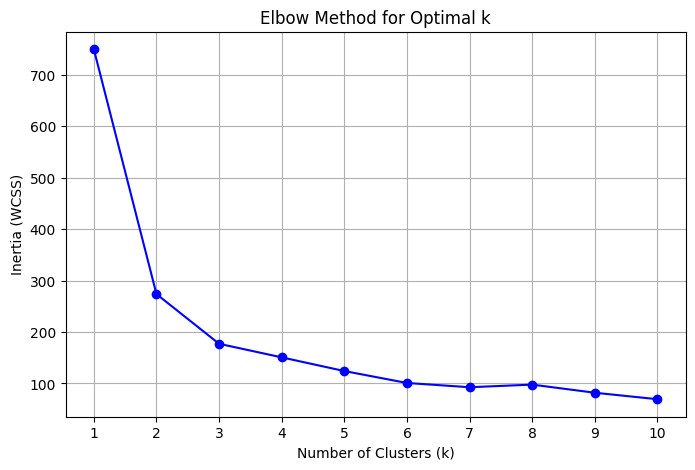

In [5]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_range)
plt.grid()
plt.show()

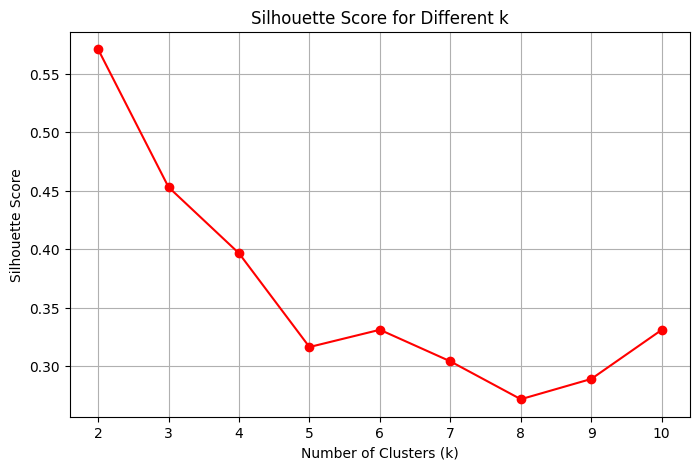

In [6]:
silhouette_scores = []

for k in range(2, 11):  # k must be at least 2 for silhouette score
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [7]:
optimal_k = 3 #based on the plots and the data

In [8]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
df['Cluster'] = kmeans.fit_predict(df_scaled)

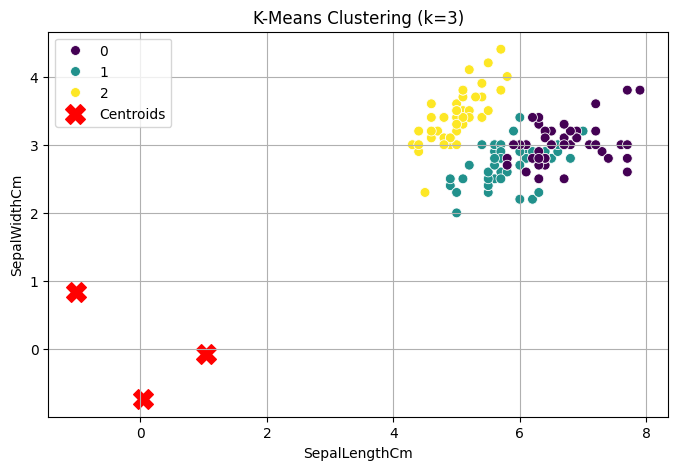

In [9]:
if df.shape[1] - 1 >= 2:  # Ensure at least 2 features
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df.iloc[:, 1], y=df.iloc[:, 2], hue=df['Cluster'], palette="viridis", s=50)
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label="Centroids")
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[2])
    plt.title(f"K-Means Clustering (k={optimal_k})")
    plt.legend()
    plt.grid()
    plt.show()

In [10]:
print("\nCluster Centers (Scaled Values):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=df_numeric.columns))


Cluster Centers (Scaled Values):
         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0  1.143179       1.035427     -0.070799       1.042248      1.092699
1  0.075602       0.038941     -0.731845       0.306760      0.215086
2 -1.154726      -1.014579      0.842307      -1.304878     -1.255129
